In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Regression Analysis (Linear)

Our objective is to show how `linear regression` attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation (R2 Score).

In [92]:
# Read the csv file into a pandas DataFrame

performance = pd.read_csv('../data/combined_actual.csv')
performance.head()

,year,dow_dollars,snp500_dollars,tbm_dollars
0,2000,10000.00,10000.00,10000.00
1,2001,9287.04,8695.73,12164.29
2,2002,7730.12,6663.89,11240.88
3,2003,9686.69,8421.85,18906.64
4,2004,9992.76,9179.27,18489.81


In [93]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = performance["year"].values.reshape(-1, 1)
y = performance["tbm_dollars"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (20, 1) (20, 1)


Text(0, 0.5, 'TBM Performance')

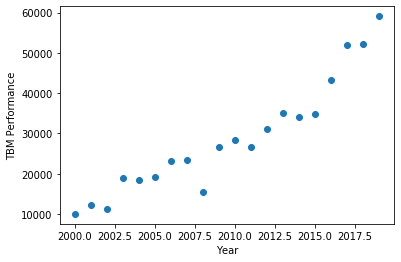

In [94]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("Year")
plt.ylabel("TBM Performance")

In [95]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [96]:
# Create the model

from sklearn.linear_model import LinearRegression
    
model = LinearRegression()

In [97]:
# Fit the model to the training data. 

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
print('Weight coefficient: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficient:  [[2311.97236048]]
y-axis intercept:  [-4616880.36440785]


Since our regression model is a linear one, the relationship between the target variable (y) and the feature variable (x) is defined as 

$$y = \text{weight} \times x + \text{intercept}$$

Plugging in the min and max values into this equation, we can plot the regression fit to our training data:

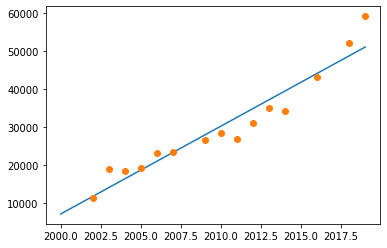

In [99]:
min_pt = X.min() * model.coef_[0] + model.intercept_
max_pt = X.max() * model.coef_[0] + model.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o');

We use the `predict` method to predict the target variable. And we expect these predicted values to fall onto the line that we plotted previously:

In [100]:
y_pred_train = model.predict(X_train)

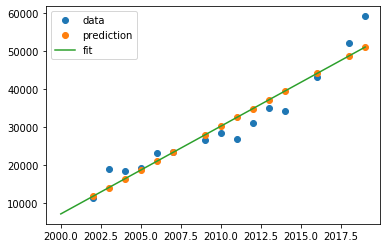

In [101]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

The line is able to capture the general slope of the data, but not many details.

Next, the test set:

In [102]:
y_pred_test = model.predict(X_test)

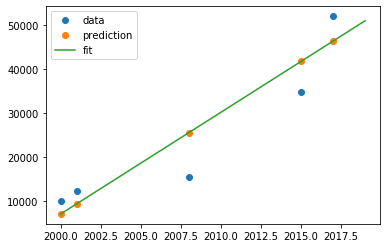

In [103]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

Note scikit-learn provides an easy way to evaluate the prediction quantitatively using the `score` method. For regression tasks, this is the R<sup>2</sup> score. Another popular way would be the Mean Squared Error (MSE). As its name implies, the MSE is simply the average squared difference over the predicted and actual target values

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2$$

In [104]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 39628360.19922507
R-squared (R2 ): 0.8479633842228024


A "good" MSE score will be close to zero while a "good" [R2 Score](https://en.wikipedia.org/wiki/Coefficient_of_determination) will be close to 1.

R2 Score is the default scoring for many of the Sklearn models.

In [105]:
# Call the `score` method on the model to show the r2 score

model.score(X_test, y_test)

0.8479633842228025

KNeighborsRegression
=======================
We can also use a neighbor based method for regression. We can simply take the output of the nearest point, or we could average several nearest points. This method is less popular for regression than for classification, but still a good baseline.

Our objective is to find the R2 Score. The R2 Score is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_predicted) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().

We can implement `GridSearchCV` to help decide the best value of `k`.

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set `X_test, y_test`. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally. Below is a flowchart of typical `cross validation` workflow in model training. The best parameters can be determined by `grid search techniques`.

Grid Search Workflow

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="100%">

In the cell below, we use the the default 5-fold `cross validation` parameter `(cv=5)`.

In [106]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 3}

In [107]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=3)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

The training set.

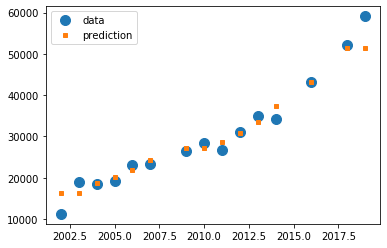

In [108]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="prediction", markersize=4)
plt.legend(loc='best');

The testing set.

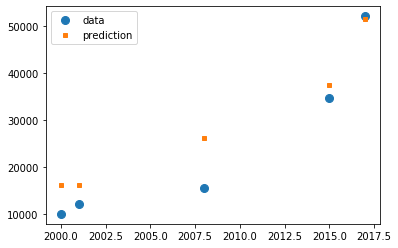

In [109]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="prediction", markersize=4)
plt.legend(loc='best');

R2 Score.

In [110]:
kneighbor_regression.score(X_test, y_test)

0.8664955650947519

Here, the linear model was a good fit for our problem.